In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd.variable import Variable
from torchvision import datasets, transforms
from torchvision.utils import save_image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size=100
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)

# # Define the generator network
# class Generator(nn.Module):
#     def __init__(self):
#         super(Generator, self).__init__()
#         self.main = nn.Sequential(
#             nn.Linear(100, 256),
#             nn.ReLU(),
#             nn.Linear(256, 512),
#             nn.ReLU(),
#             nn.Linear(512, 1024),
#             nn.ReLU(),
#             nn.Linear(1024, 784),
#             nn.Tanh()
#         )

#     def forward(self, x):
#         return self.main(x).view(-1, 1, 28, 28)

# # Define the discriminator network
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.main = nn.Sequential(
#             nn.Linear(784, 1024),
#             nn.ReLU(),
#             nn.Linear(1024, 512),
#             nn.ReLU(),
#             nn.Linear(512, 256),
#             nn.ReLU(),
#             nn.Linear(256, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = x.view(-1, 784)
#         return self.main(x)

# Define the generator network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.model(x.view(x.size(0), 784))
        return out.view(out.size(0), -1)

# Display images during the training process
def display_images(images, title):
    images = images.cpu().detach().numpy()
    images = (images * 0.5) + 0.5  # Unnormalize
    images = images.reshape(images.shape[0], 28, 28)
    plt.figure(figsize=(8, 8))
    for i in range(min(images.shape[0], 64)):  # Limit the number of displayed images to 64
        plt.subplot(8, 8, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Initialize the networks
generator = Generator().to(device)
discriminator = Discriminator().to(device)

100%|██████████| 9912422/9912422 [00:00<00:00, 187945948.64it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 24833065.56it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 65699194.39it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 22281320.20it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Iterations = 20000 & Binary Cross Entropy (BCE) loss

Epoch [1/33], Step [100/600], D_loss: 0.4417, G_loss: 14.8681
Epoch [1/33], Step [200/600], D_loss: 0.3443, G_loss: 31.4605
Epoch [1/33], Step [300/600], D_loss: 0.3313, G_loss: 23.9010
Epoch [1/33], Step [400/600], D_loss: 0.3471, G_loss: 6.2835
Epoch [1/33], Step [500/600], D_loss: 0.3532, G_loss: 23.2618
Epoch [1/33], Step [600/600], D_loss: 0.3395, G_loss: 9.0667
Epoch [2/33], Step [100/600], D_loss: 0.5871, G_loss: 2.3683
Epoch [2/33], Step [200/600], D_loss: 0.4898, G_loss: 9.7414
Epoch [2/33], Step [300/600], D_loss: 0.4538, G_loss: 6.2892
Epoch [2/33], Step [400/600], D_loss: 0.4101, G_loss: 10.3148
Epoch [2/33], Step [500/600], D_loss: 0.3981, G_loss: 14.5969
Epoch [2/33], Step [600/600], D_loss: 0.4480, G_loss: 7.5032
Epoch [3/33], Step [100/600], D_loss: 0.3402, G_loss: 11.9840
Epoch [3/33], Step [200/600], D_loss: 0.4643, G_loss: 7.6963
Epoch [3/33], Step [300/600], D_loss: 0.3892, G_loss: 9.5057
Epoch [3/33], Step [400/600], D_loss: 0.3847, G_loss: 7.2773
Epoch [3/33], Ste

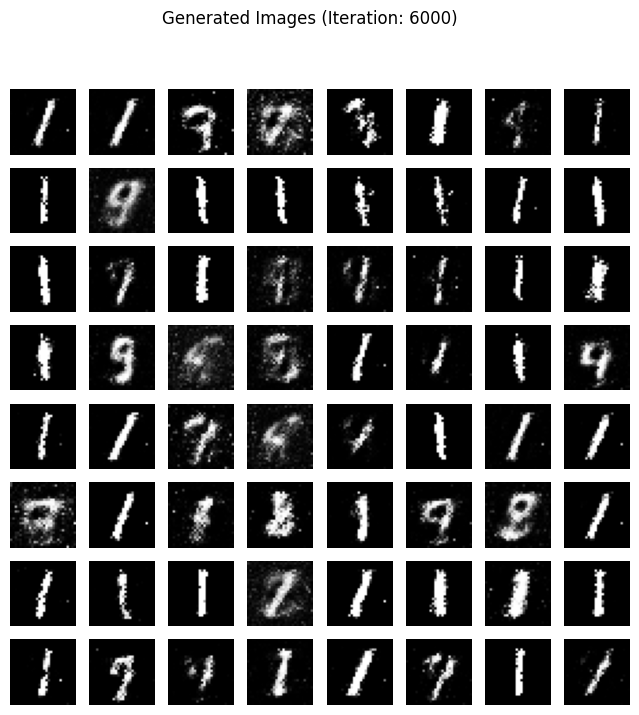

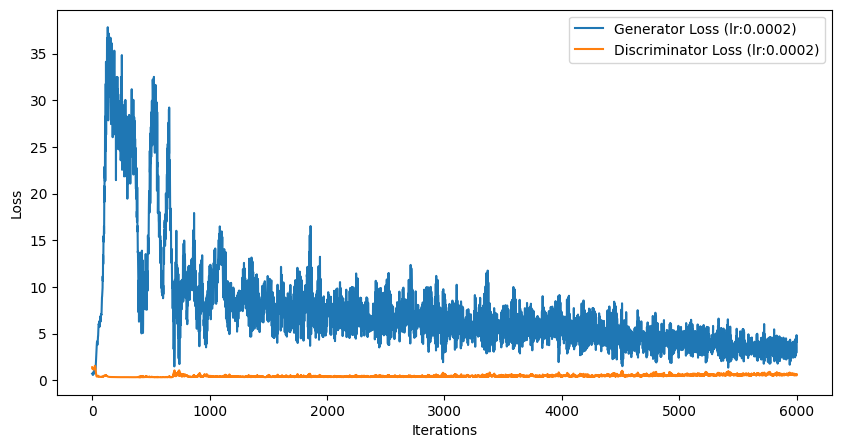

Epoch [11/33], Step [100/600], D_loss: 0.6480, G_loss: 3.4942
Epoch [11/33], Step [200/600], D_loss: 0.7430, G_loss: 2.9958
Epoch [11/33], Step [300/600], D_loss: 0.7759, G_loss: 2.6393
Epoch [11/33], Step [400/600], D_loss: 0.6750, G_loss: 2.2376
Epoch [11/33], Step [500/600], D_loss: 0.5264, G_loss: 2.8139
Epoch [11/33], Step [600/600], D_loss: 0.6862, G_loss: 2.8740
Epoch [12/33], Step [100/600], D_loss: 0.6028, G_loss: 3.5757
Epoch [12/33], Step [200/600], D_loss: 0.7540, G_loss: 1.9321
Epoch [12/33], Step [300/600], D_loss: 0.7149, G_loss: 2.4585
Epoch [12/33], Step [400/600], D_loss: 0.8274, G_loss: 4.2744
Epoch [12/33], Step [500/600], D_loss: 0.6295, G_loss: 3.1972
Epoch [12/33], Step [600/600], D_loss: 0.6944, G_loss: 2.8204
Epoch [13/33], Step [100/600], D_loss: 0.7854, G_loss: 2.2534
Epoch [13/33], Step [200/600], D_loss: 0.7549, G_loss: 2.9490
Epoch [13/33], Step [300/600], D_loss: 0.6330, G_loss: 3.8038
Epoch [13/33], Step [400/600], D_loss: 0.6396, G_loss: 2.8282
Epoch [1

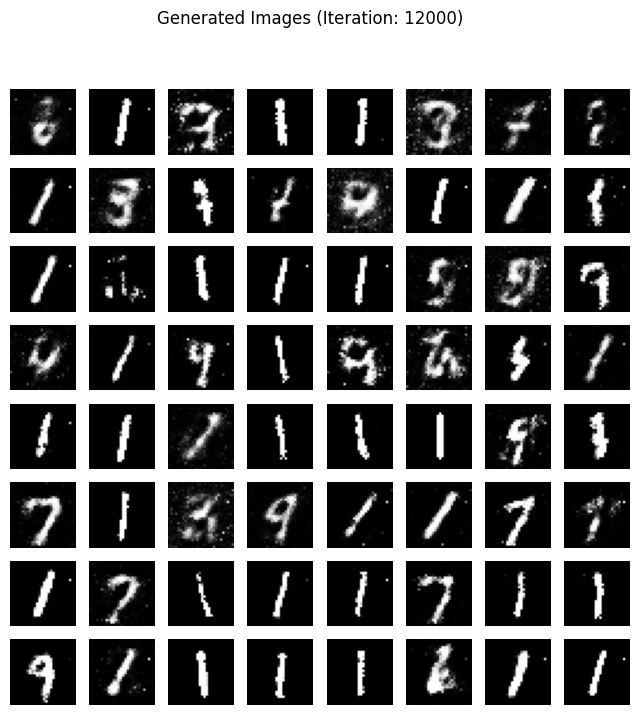

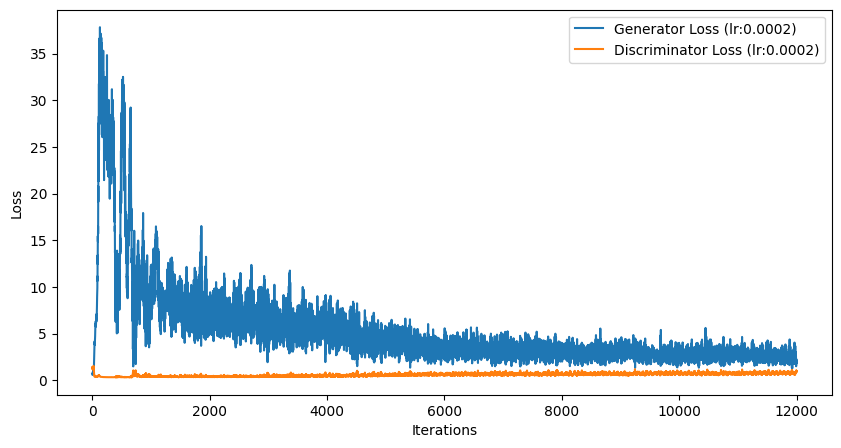

Epoch [21/33], Step [100/600], D_loss: 0.8368, G_loss: 1.8029
Epoch [21/33], Step [200/600], D_loss: 0.7124, G_loss: 2.3201
Epoch [21/33], Step [300/600], D_loss: 0.9068, G_loss: 2.8208
Epoch [21/33], Step [400/600], D_loss: 0.8881, G_loss: 2.0500
Epoch [21/33], Step [500/600], D_loss: 0.8755, G_loss: 2.6778
Epoch [21/33], Step [600/600], D_loss: 0.7406, G_loss: 3.1788
Epoch [22/33], Step [100/600], D_loss: 0.8014, G_loss: 2.6547
Epoch [22/33], Step [200/600], D_loss: 0.8812, G_loss: 1.9995
Epoch [22/33], Step [300/600], D_loss: 1.0317, G_loss: 1.9126
Epoch [22/33], Step [400/600], D_loss: 0.8222, G_loss: 2.6509
Epoch [22/33], Step [500/600], D_loss: 0.7373, G_loss: 2.1552
Epoch [22/33], Step [600/600], D_loss: 0.7197, G_loss: 2.7269
Epoch [23/33], Step [100/600], D_loss: 1.0845, G_loss: 1.7166
Epoch [23/33], Step [200/600], D_loss: 0.7614, G_loss: 2.6996
Epoch [23/33], Step [300/600], D_loss: 0.8299, G_loss: 2.5045
Epoch [23/33], Step [400/600], D_loss: 0.6469, G_loss: 2.6684
Epoch [2

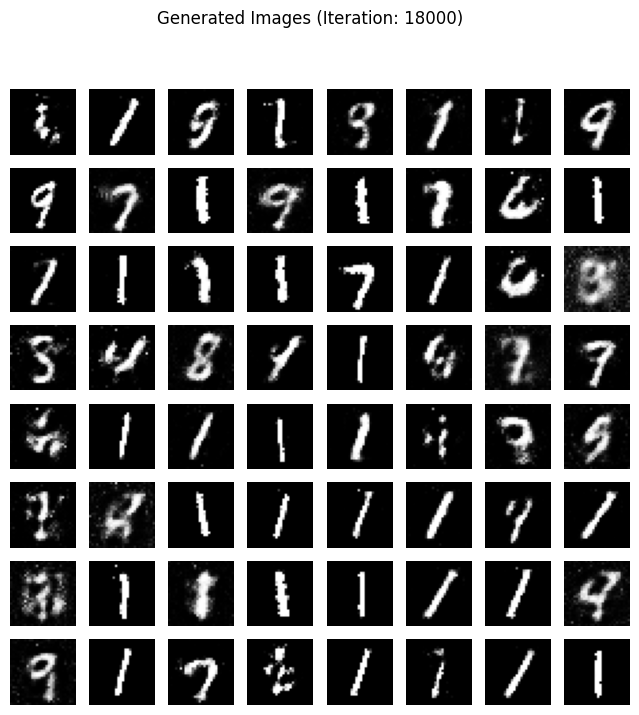

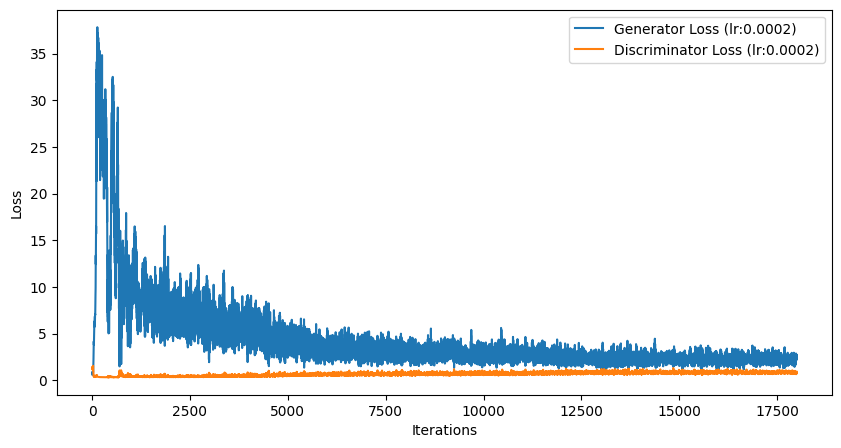

Epoch [31/33], Step [100/600], D_loss: 0.9183, G_loss: 2.0686
Epoch [31/33], Step [200/600], D_loss: 0.8385, G_loss: 2.2435
Epoch [31/33], Step [300/600], D_loss: 1.0028, G_loss: 2.1515
Epoch [31/33], Step [400/600], D_loss: 1.0661, G_loss: 1.5573
Epoch [31/33], Step [500/600], D_loss: 0.8373, G_loss: 1.9403
Epoch [31/33], Step [600/600], D_loss: 0.9175, G_loss: 1.6894
Epoch [32/33], Step [100/600], D_loss: 0.9267, G_loss: 1.8109
Epoch [32/33], Step [200/600], D_loss: 0.9288, G_loss: 2.4141
Epoch [32/33], Step [300/600], D_loss: 1.0760, G_loss: 2.0203
Epoch [32/33], Step [400/600], D_loss: 0.8267, G_loss: 1.6436
Epoch [32/33], Step [500/600], D_loss: 0.8414, G_loss: 2.5890
Epoch [32/33], Step [600/600], D_loss: 0.7702, G_loss: 2.1862
Epoch [33/33], Step [100/600], D_loss: 0.8361, G_loss: 2.4466
Epoch [33/33], Step [200/600], D_loss: 0.8113, G_loss: 2.7205
Epoch [33/33], Step [300/600], D_loss: 0.8934, G_loss: 2.3128
Epoch [33/33], Step [400/600], D_loss: 0.9711, G_loss: 2.2702
Epoch [3

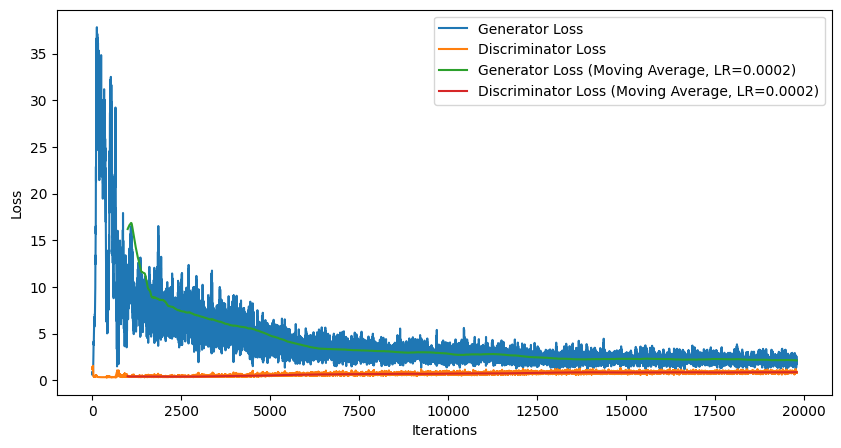

Time taken: 657.5242176055908
Training complete. Generated adversarial MNIST images saved.


In [ ]:
# Initialize the networks
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Define the loss function and optimizers
criterion = nn.BCELoss().to(device)

optimizer_gen = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_disc = optim.Adam(discriminator.parameters(), lr=0.0002)

gen_losses = []
disc_losses = []

# Train the GAN
iterations = 20000
num_epochs = round((iterations/60000)*batch_size)
start_time = time.time()

for epoch in range(num_epochs):

    for i, (real_images, _) in enumerate(train_loader):

        # Train the discriminator
        optimizer_disc.zero_grad()

        real_images = Variable(real_images).to(device)
        real_labels = Variable(torch.full((real_images.size(0), 1), 0.9)).to(device)  # label smoothing
        fake_labels = Variable(torch.zeros(real_images.size(0), 1)).to(device)

        outputs = discriminator(real_images).to(device)
        real_loss = criterion(outputs, real_labels) # Binary Cross Entropy (BCE) loss

        noise = Variable(torch.randn(real_images.size(0), 100)).to(device)
        fake_images = generator(noise).to(device)
        outputs = discriminator(fake_images.detach())
        fake_loss = criterion(outputs, fake_labels) # Binary Cross Entropy (BCE) loss

        disc_loss = real_loss + fake_loss
        disc_loss.backward()
        optimizer_disc.step()

        # Train the generator
        optimizer_gen.zero_grad()

        outputs = discriminator(fake_images)
        gen_loss = criterion(outputs, real_labels)
        gen_loss.backward()
        optimizer_gen.step()

        gen_losses.append(gen_loss.item())
        disc_losses.append(disc_loss.item())

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], D_loss: {:.4f}, G_loss: {:.4f}'
                  .format(epoch+1, num_epochs, i + 1, len(train_loader), disc_loss.item(), gen_loss.item()))

    # Save real images and generated images
    if (epoch + 1) % 10 == 0:
        save_image(real_images, '/content/data/real_images_{}.png'.format(epoch + 1), normalize=True)
        save_image(fake_images, '/content/data/fake_images_{}.png'.format(epoch + 1), normalize=True)

    # Display images during the training process
    if (epoch * len(train_loader) + i + 1) % 2000 == 0:
        display_images(fake_images, f'Generated Images (Iteration: {epoch * len(train_loader) + i + 1})')

        # Plot losses
        plt.figure(figsize=(10, 5))
        plt.plot(gen_losses, label=f'Generator Loss (lr:{optimizer_gen.param_groups[0]["lr"]})')
        plt.plot(disc_losses, label=f'Discriminator Loss (lr:{optimizer_disc.param_groups[0]["lr"]})')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

end_time = time.time()

print(f"Time taken: {end_time - start_time}")

# Calculate moving average
window_size = 1000
gen_losses_avg = np.convolve(gen_losses, np.ones(window_size)/window_size, mode='valid')
disc_losses_avg = np.convolve(disc_losses, np.ones(window_size)/window_size, mode='valid')

# Plot losses with moving average
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.plot(np.arange(window_size-1, len(gen_losses)), gen_losses_avg, label='Generator Loss (Moving Average)')
plt.plot(np.arange(window_size-1, len(disc_losses)), disc_losses_avg, label='Discriminator Loss (Moving Average)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend([
    'Generator Loss',
    'Discriminator Loss',
    f'Generator Loss (Moving Average, LR={optimizer_gen.param_groups[0]["lr"]})',
    f'Discriminator Loss (Moving Average, LR={optimizer_disc.param_groups[0]["lr"]})',
])
plt.show()

end_time = time.time()

print(f"Time taken: {end_time - start_time}")

# Generate adversarial MNIST images
noise = Variable(torch.randn(64, 100)).to(device)
generated_images = generator(noise)
save_image(generated_images, f'/content/data/generated_images_{iterations}.png', normalize=True)

print("Training complete. Generated adversarial MNIST images saved.")

In [ ]:
# Initialize the networks
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Define the loss function and optimizers
criterion = nn.BCELoss().to(device)

optimizer_gen = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_disc = optim.Adam(discriminator.parameters(), lr=0.0002)

gen_losses = []
disc_losses = []

# Train the GAN
iterations = 100000
num_epochs = round((iterations/60000)*batch_size)
start_time = time.time()

for epoch in range(num_epochs):

    for i, (real_images, _) in enumerate(train_loader):

        # Train the discriminator
        optimizer_disc.zero_grad()

        real_images = Variable(real_images).to(device)
        real_labels = Variable(torch.full((real_images.size(0), 1), 0.9)).to(device)  # label smoothing
        fake_labels = Variable(torch.zeros(real_images.size(0), 1)).to(device)

        outputs = discriminator(real_images).to(device)
        real_loss = criterion(outputs, real_labels) # Binary Cross Entropy (BCE) loss

        noise = Variable(torch.randn(real_images.size(0), 100)).to(device)
        fake_images = generator(noise).to(device)
        outputs = discriminator(fake_images.detach())
        fake_loss = criterion(outputs, fake_labels) # Binary Cross Entropy (BCE) loss

        disc_loss = real_loss + fake_loss
        disc_loss.backward()
        optimizer_disc.step()

        # Train the generator
        optimizer_gen.zero_grad()

        outputs = discriminator(fake_images)
        gen_loss = criterion(outputs, real_labels)
        gen_loss.backward()
        optimizer_gen.step()

        gen_losses.append(gen_loss.item())
        disc_losses.append(disc_loss.item())

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], D_loss: {:.4f}, G_loss: {:.4f}'
                  .format(epoch+1, num_epochs, i + 1, len(train_loader), disc_loss.item(), gen_loss.item()))

    # Save real images and generated images
    if (epoch + 1) % 10 == 0:
        save_image(real_images, '/content/data/real_images_{}.png'.format(epoch + 1), normalize=True)
        save_image(fake_images, '/content/data/fake_images_{}.png'.format(epoch + 1), normalize=True)

    # Display images during the training process
    if (epoch * len(train_loader) + i + 1) % 2000 == 0:
        display_images(fake_images, f'Generated Images (Iteration: {epoch * len(train_loader) + i + 1})')

        # Plot losses
        plt.figure(figsize=(10, 5))
        plt.plot(gen_losses, label=f'Generator Loss (lr:{optimizer_gen.param_groups[0]["lr"]})')
        plt.plot(disc_losses, label=f'Discriminator Loss (lr:{optimizer_disc.param_groups[0]["lr"]})')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

end_time = time.time()

print(f"Time taken: {end_time - start_time}")

# Calculate moving average
window_size = 1000
gen_losses_avg = np.convolve(gen_losses, np.ones(window_size)/window_size, mode='valid')
disc_losses_avg = np.convolve(disc_losses, np.ones(window_size)/window_size, mode='valid')

# Plot losses with moving average
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.plot(np.arange(window_size-1, len(gen_losses)), gen_losses_avg, label='Generator Loss (Moving Average)')
plt.plot(np.arange(window_size-1, len(disc_losses)), disc_losses_avg, label='Discriminator Loss (Moving Average)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend([
    'Generator Loss',
    'Discriminator Loss',
    f'Generator Loss (Moving Average, LR={optimizer_gen.param_groups[0]["lr"]})',
    f'Discriminator Loss (Moving Average, LR={optimizer_disc.param_groups[0]["lr"]})',
])
plt.show()

end_time = time.time()

print(f"Time taken: {end_time - start_time}")

# Generate adversarial MNIST images
noise = Variable(torch.randn(64, 100)).to(device)
generated_images = generator(noise)
save_image(generated_images, f'/content/data/generated_images_{iterations}.png', normalize=True)

print("Training complete. Generated adversarial MNIST images saved.")

In [ ]:
# Initialize the networks
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Define the loss function and optimizers
criterion = nn.BCELoss().to(device)

optimizer_gen = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_disc = optim.Adam(discriminator.parameters(), lr=0.0002)

gen_losses = []
disc_losses = []

# Train the GAN
iterations = 10000
num_epochs = round((iterations/60000)*batch_size)
start_time = time.time()

for epoch in range(num_epochs):

    for i, (real_images, _) in enumerate(train_loader):

        # Train the discriminator
        optimizer_disc.zero_grad()

        real_images = Variable(real_images).to(device)
        real_labels = Variable(torch.ones(real_images.size(0), 1)).to(device)
        fake_labels = Variable(torch.zeros(real_images.size(0), 1)).to(device)

        outputs = discriminator(real_images).to(device)
        real_loss = criterion(outputs, real_labels) # Binary Cross Entropy (BCE) loss

        noise = Variable(torch.randn(real_images.size(0), 100)).to(device)
        fake_images = generator(noise).to(device)
        outputs = discriminator(fake_images.detach())
        fake_loss = criterion(outputs, fake_labels) # Binary Cross Entropy (BCE) loss

        disc_loss = real_loss + fake_loss
        disc_loss.backward()
        optimizer_disc.step()

        # Train the generator
        optimizer_gen.zero_grad()

        outputs = discriminator(fake_images)
        gen_loss = criterion(outputs, real_labels)
        gen_loss.backward()
        optimizer_gen.step()

        gen_losses.append(gen_loss.item())
        disc_losses.append(disc_loss.item())

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], D_loss: {:.4f}, G_loss: {:.4f}'
                  .format(epoch+1, num_epochs, i + 1, len(train_loader), disc_loss.item(), gen_loss.item()))

    # Save real images and generated images
    if (epoch + 1) % 10 == 0:
        save_image(real_images, '/content/data/real_images_{}.png'.format(epoch + 1), normalize=True)
        save_image(fake_images, '/content/data/fake_images_{}.png'.format(epoch + 1), normalize=True)

    # Display images and losses during the training process
    if (epoch * len(train_loader) + i + 1) % 2000 == 0:
        display_images(fake_images, f'Generated Images (Iteration: {epoch * len(train_loader) + i + 1})')

        plt.figure(figsize=(10, 5))
        plt.plot(gen_losses, label='Generator Loss, lr: {}'.format(optimizer_gen.param_groups[0]['lr']))
        plt.plot(disc_losses, label='Discriminator Loss, lr: {}'.format(optimizer_disc.param_groups[0]['lr']))
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

end_time = time.time()
print('Total training time: {:.2f} minutes'.format((end_time - start_time)/60))

# Calculate moving average
window_size = 1000
gen_losses_avg = np.convolve(gen_losses, np.ones(window_size)/window_size, mode='valid')
disc_losses_avg = np.convolve(disc_losses, np.ones(window_size)/window_size, mode='valid')

# Plot losses with moving average
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.plot(np.arange(window_size-1, len(gen_losses)), gen_losses_avg, label='Generator Loss (Moving Average)')
plt.plot(np.arange(window_size-1, len(disc_losses)), disc_losses_avg, label='Discriminator Loss (Moving Average)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate adversarial MNIST images
noise = Variable(torch.randn(64, 100)).to(device)
generated_images = generator(noise)
save_image(generated_images, f'/content/data/generated_images_{iterations}.png', normalize=True)

print("Training complete. Generated adversarial MNIST images saved.")

# Iterations = 20000 & Logistic loss

Epoch [1/33], Step [100/600], D_loss: 0.0429, G_loss: 20.2627
Epoch [1/33], Step [200/600], D_loss: 0.0184, G_loss: 32.0533
Epoch [1/33], Step [300/600], D_loss: 0.0061, G_loss: 32.3014
Epoch [1/33], Step [400/600], D_loss: 0.0018, G_loss: 33.0090
Epoch [1/33], Step [500/600], D_loss: 0.0029, G_loss: 33.8654
Epoch [1/33], Step [600/600], D_loss: 0.3205, G_loss: 33.2562
Epoch [2/33], Step [100/600], D_loss: 0.0868, G_loss: 31.0015
Epoch [2/33], Step [200/600], D_loss: 0.0648, G_loss: 24.5674
Epoch [2/33], Step [300/600], D_loss: 0.0742, G_loss: 17.1034
Epoch [2/33], Step [400/600], D_loss: 0.1298, G_loss: 14.9240
Epoch [2/33], Step [500/600], D_loss: 0.1712, G_loss: 7.8477
Epoch [2/33], Step [600/600], D_loss: 0.2633, G_loss: 38.0528
Epoch [3/33], Step [100/600], D_loss: 0.1342, G_loss: 10.4233
Epoch [3/33], Step [200/600], D_loss: 0.0956, G_loss: 12.1411
Epoch [3/33], Step [300/600], D_loss: 0.0474, G_loss: 8.1861
Epoch [3/33], Step [400/600], D_loss: 0.0938, G_loss: 14.4392
Epoch [3/3

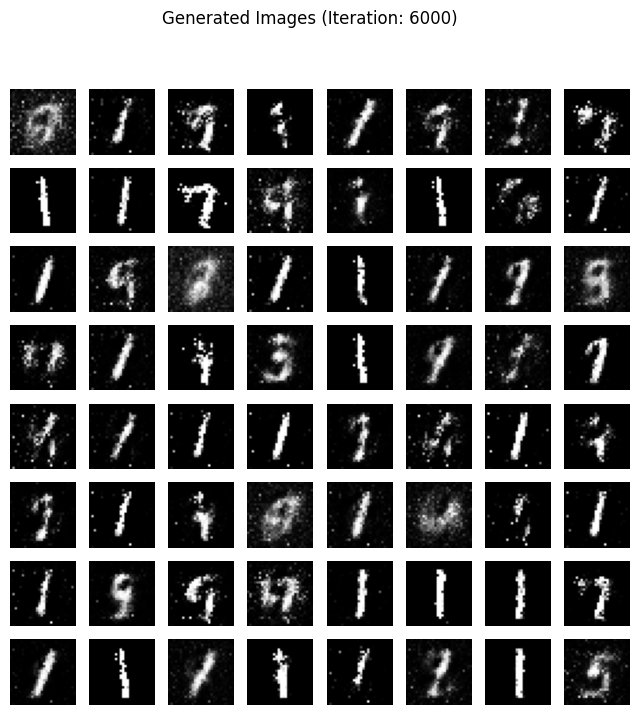

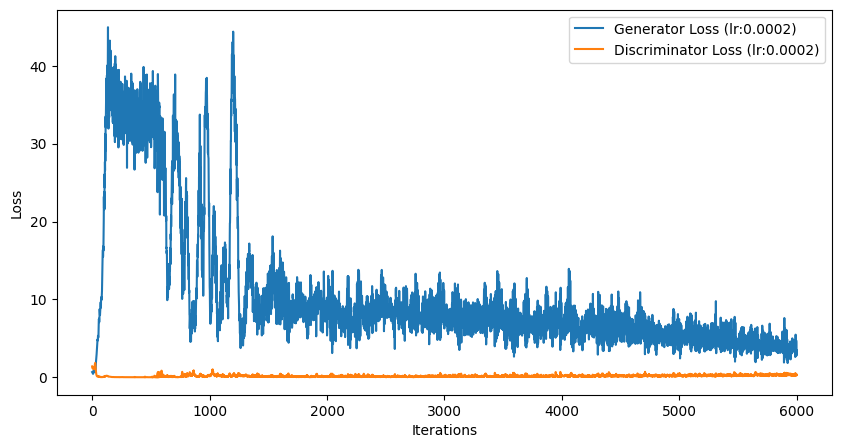

Epoch [11/33], Step [100/600], D_loss: 0.3511, G_loss: 3.8597
Epoch [11/33], Step [200/600], D_loss: 0.2284, G_loss: 4.2520
Epoch [11/33], Step [300/600], D_loss: 0.2244, G_loss: 4.0022
Epoch [11/33], Step [400/600], D_loss: 0.3980, G_loss: 3.5793
Epoch [11/33], Step [500/600], D_loss: 0.3209, G_loss: 3.5651
Epoch [11/33], Step [600/600], D_loss: 0.5279, G_loss: 3.4194
Epoch [12/33], Step [100/600], D_loss: 0.2629, G_loss: 3.4642
Epoch [12/33], Step [200/600], D_loss: 0.4740, G_loss: 3.2954
Epoch [12/33], Step [300/600], D_loss: 0.3430, G_loss: 4.2116
Epoch [12/33], Step [400/600], D_loss: 0.4101, G_loss: 2.5946
Epoch [12/33], Step [500/600], D_loss: 0.3042, G_loss: 4.6699
Epoch [12/33], Step [600/600], D_loss: 0.3333, G_loss: 2.2041
Epoch [13/33], Step [100/600], D_loss: 0.4405, G_loss: 2.7773
Epoch [13/33], Step [200/600], D_loss: 0.3069, G_loss: 2.1664
Epoch [13/33], Step [300/600], D_loss: 0.3052, G_loss: 3.2243
Epoch [13/33], Step [400/600], D_loss: 0.5052, G_loss: 3.4793
Epoch [1

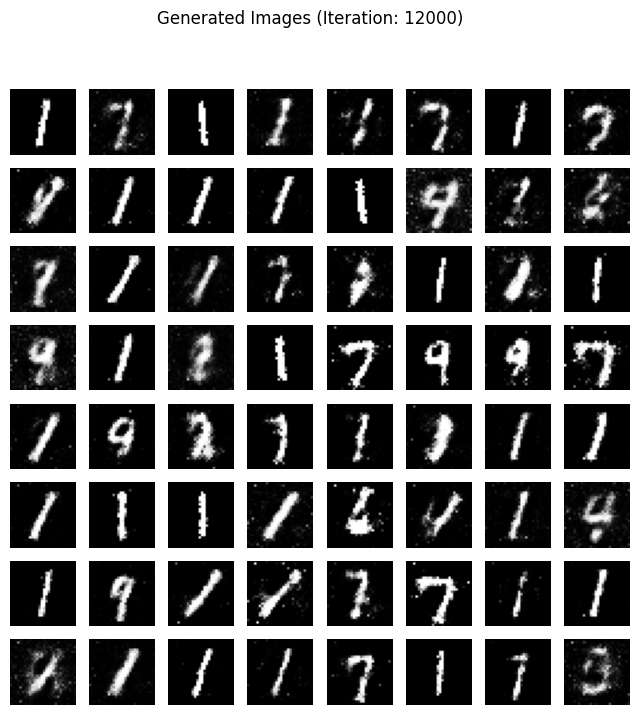

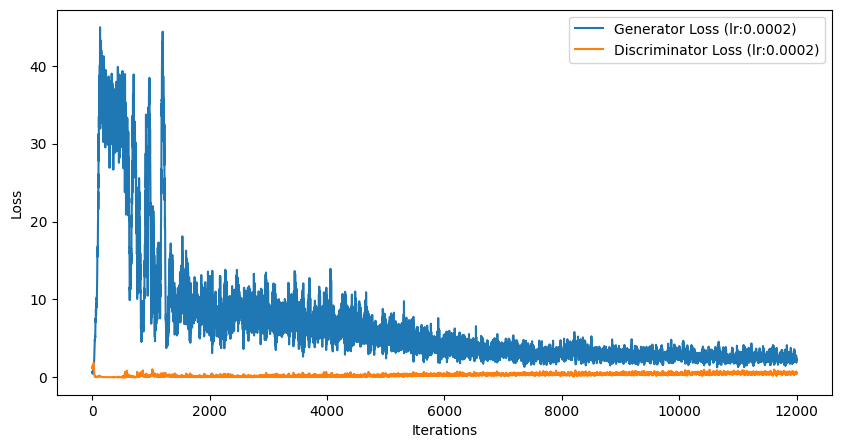

Epoch [21/33], Step [100/600], D_loss: 0.4601, G_loss: 2.3086
Epoch [21/33], Step [200/600], D_loss: 0.5620, G_loss: 2.8215
Epoch [21/33], Step [300/600], D_loss: 0.5580, G_loss: 2.1224
Epoch [21/33], Step [400/600], D_loss: 0.5093, G_loss: 2.4010
Epoch [21/33], Step [500/600], D_loss: 0.5545, G_loss: 1.8697
Epoch [21/33], Step [600/600], D_loss: 0.7297, G_loss: 2.3762
Epoch [22/33], Step [100/600], D_loss: 0.3887, G_loss: 2.1149
Epoch [22/33], Step [200/600], D_loss: 0.6010, G_loss: 3.1183
Epoch [22/33], Step [300/600], D_loss: 0.6607, G_loss: 1.9696
Epoch [22/33], Step [400/600], D_loss: 0.5561, G_loss: 1.9900
Epoch [22/33], Step [500/600], D_loss: 0.6772, G_loss: 2.5654
Epoch [22/33], Step [600/600], D_loss: 0.5565, G_loss: 1.5531
Epoch [23/33], Step [100/600], D_loss: 0.5143, G_loss: 2.4839
Epoch [23/33], Step [200/600], D_loss: 0.7963, G_loss: 1.6947
Epoch [23/33], Step [300/600], D_loss: 0.4941, G_loss: 2.0180
Epoch [23/33], Step [400/600], D_loss: 0.7529, G_loss: 1.9801
Epoch [2

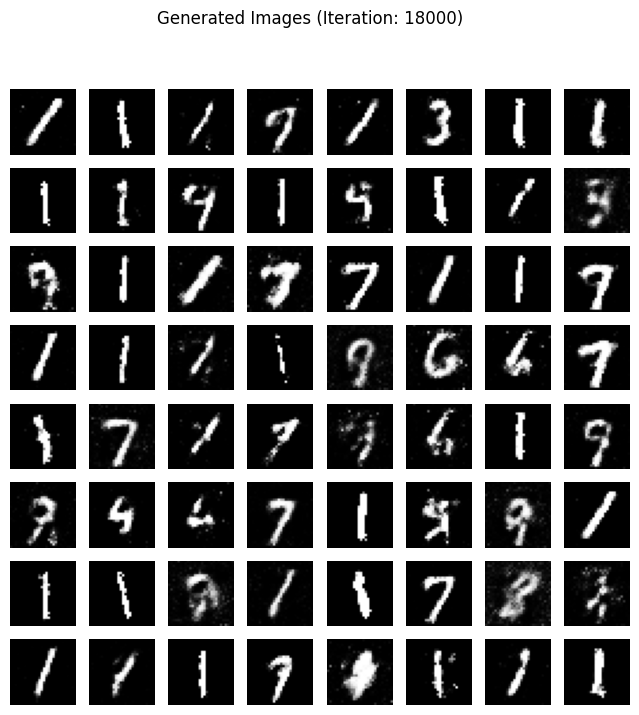

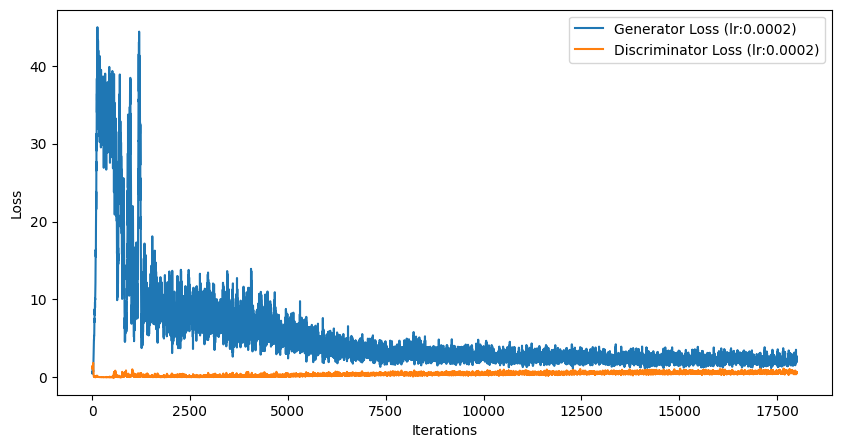

Epoch [31/33], Step [100/600], D_loss: 0.5472, G_loss: 2.3679
Epoch [31/33], Step [200/600], D_loss: 0.4153, G_loss: 3.1679
Epoch [31/33], Step [300/600], D_loss: 0.6096, G_loss: 2.0042
Epoch [31/33], Step [400/600], D_loss: 0.5991, G_loss: 2.3386
Epoch [31/33], Step [500/600], D_loss: 0.6750, G_loss: 2.3251
Epoch [31/33], Step [600/600], D_loss: 0.6756, G_loss: 2.3178
Epoch [32/33], Step [100/600], D_loss: 0.6677, G_loss: 1.9081
Epoch [32/33], Step [200/600], D_loss: 0.4120, G_loss: 2.6915
Epoch [32/33], Step [300/600], D_loss: 0.8218, G_loss: 1.6585
Epoch [32/33], Step [400/600], D_loss: 0.5627, G_loss: 2.5389
Epoch [32/33], Step [500/600], D_loss: 0.5128, G_loss: 2.3255
Epoch [32/33], Step [600/600], D_loss: 0.9158, G_loss: 1.3011
Epoch [33/33], Step [100/600], D_loss: 0.4984, G_loss: 2.2618
Epoch [33/33], Step [200/600], D_loss: 0.7374, G_loss: 2.5811
Epoch [33/33], Step [300/600], D_loss: 1.0340, G_loss: 1.2117
Epoch [33/33], Step [400/600], D_loss: 0.5065, G_loss: 2.6787
Epoch [3

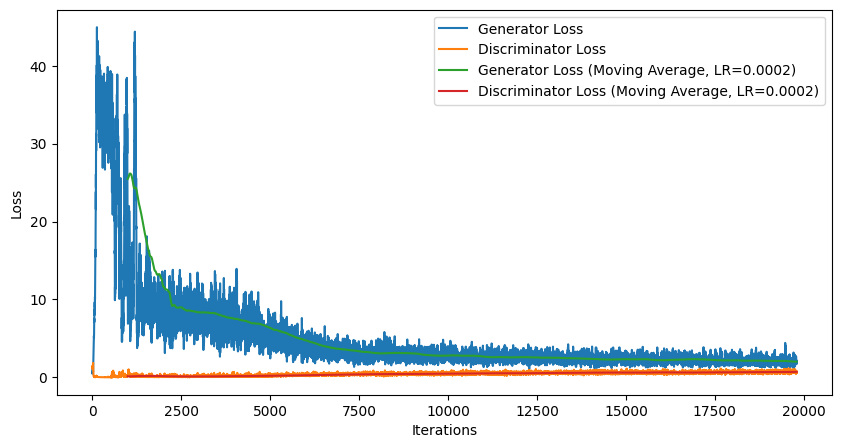

Time taken: 652.3537862300873
Training complete. Generated adversarial MNIST images saved.


In [ ]:
# Initialize the networks
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Define the loss function and optimizers
criterion = nn.BCELoss()
criterion.to(device)

optimizer_gen = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_disc = optim.Adam(discriminator.parameters(), lr=0.0002)

gen_losses = []
disc_losses = []

# Train the GAN
iterations = 20000
num_epochs = round((iterations/60000)*batch_size)
start_time = time.time()

for epoch in range(num_epochs):

    for i, (real_images, _) in enumerate(train_loader):

        # Train the discriminator
        optimizer_disc.zero_grad()

        # Real images
        real_images = Variable(real_images).to(device)
        real_labels = Variable(torch.ones(real_images.size(0), 1)).to(device)  # ones, not 0.9
        outputs = discriminator(real_images)
        real_loss = criterion(outputs, real_labels)

        # Fake images
        noise = Variable(torch.randn(real_images.size(0), 100)).to(device)
        fake_images = generator(noise)
        outputs = discriminator(fake_images.detach())
        fake_labels = Variable(torch.zeros(real_images.size(0), 1)).to(device)  # zeros, not 0.9
        fake_loss = criterion(outputs, fake_labels)

        # Update discriminator
        disc_loss = real_loss + fake_loss
        disc_loss.backward()
        optimizer_disc.step()

        # Train the generator
        optimizer_gen.zero_grad()

        # Update generator
        outputs = discriminator(fake_images)
        gen_labels = Variable(torch.ones(real_images.size(0), 1)).to(device)  # ones, not 0.9
        gen_loss = criterion(outputs, gen_labels)
        gen_loss.backward()
        optimizer_gen.step()

        gen_losses.append(gen_loss.item())
        disc_losses.append(disc_loss.item())

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], D_loss: {:.4f}, G_loss: {:.4f}'
                  .format(epoch+1, num_epochs, i + 1, len(train_loader), disc_loss.item(), gen_loss.item()))

    # Save real images and generated images
    if (epoch + 1) % 10 == 0:
        save_image(real_images, '/content/data/real_images_{}.png'.format(epoch + 1), normalize=True)
        save_image(fake_images, '/content/data/fake_images_{}.png'.format(epoch + 1), normalize=True)

    # Display images during the training process
    if (epoch * len(train_loader) + i + 1) % 2000 == 0:
        display_images(fake_images, f'Generated Images (Iteration: {epoch * len(train_loader) + i + 1})')

        # Plot losses
        plt.figure(figsize=(10, 5))
        plt.plot(gen_losses, label=f'Generator Loss (lr:{optimizer_gen.param_groups[0]["lr"]})')
        plt.plot(disc_losses, label=f'Discriminator Loss (lr:{optimizer_disc.param_groups[0]["lr"]})')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

end_time = time.time()

print(f"Time taken: {end_time - start_time}")

# Calculate moving average
window_size = 1000
gen_losses_avg = np.convolve(gen_losses, np.ones(window_size)/window_size, mode='valid')
disc_losses_avg = np.convolve(disc_losses, np.ones(window_size)/window_size, mode='valid')

# Plot losses with moving average
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.plot(np.arange(window_size-1, len(gen_losses)), gen_losses_avg, label='Generator Loss (Moving Average)')
plt.plot(np.arange(window_size-1, len(disc_losses)), disc_losses_avg, label='Discriminator Loss (Moving Average)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend([
    'Generator Loss',
    'Discriminator Loss',
    f'Generator Loss (Moving Average, LR={optimizer_gen.param_groups[0]["lr"]})',
    f'Discriminator Loss (Moving Average, LR={optimizer_disc.param_groups[0]["lr"]})',
])
plt.show()

end_time = time.time()

print(f"Time taken: {end_time - start_time}")

# Generate adversarial MNIST images
noise = Variable(torch.randn(64, 100)).to(device)
generated_images = generator(noise)
save_image(generated_images, f'/content/data/generated_images_{iterations}.png', normalize=True)

print("Training complete. Generated adversarial MNIST images saved.")

In [ ]:
# Initialize the networks
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Define the loss function and optimizers
criterion = nn.BCELoss().to(device)

optimizer_gen = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_disc = optim.Adam(discriminator.parameters(), lr=0.0002)

gen_losses = []
disc_losses = []

# Train the GAN
iterations = 100000
num_epochs = round((iterations/60000)*batch_size)+1
start_time = time.time()

for epoch in range(num_epochs):

    for i, (real_images, _) in enumerate(train_loader):

        # Train the discriminator
        optimizer_disc.zero_grad()

        real_images = Variable(real_images).to(device)
        real_labels = Variable(torch.ones(real_images.size(0), 1)).to(device)
        fake_labels = Variable(torch.zeros(real_images.size(0), 1)).to(device)

        outputs = discriminator(real_images).to(device)
        real_loss = criterion(outputs, real_labels) # Binary Cross Entropy (BCE) loss

        noise = Variable(torch.randn(real_images.size(0), 100)).to(device)
        fake_images = generator(noise).to(device)
        outputs = discriminator(fake_images.detach())
        fake_loss = criterion(outputs, fake_labels) # Binary Cross Entropy (BCE) loss

        disc_loss = real_loss + fake_loss
        disc_loss.backward()
        optimizer_disc.step()

        # Train the generator
        optimizer_gen.zero_grad()

        outputs = discriminator(fake_images)
        gen_loss = criterion(outputs, real_labels)
        gen_loss.backward()
        optimizer_gen.step()

        gen_losses.append(gen_loss.item())
        disc_losses.append(disc_loss.item())

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], D_loss: {:.4f}, G_loss: {:.4f}'
                  .format(epoch+1, num_epochs, i + 1, len(train_loader), disc_loss.item(), gen_loss.item()))

    # Save real images and generated images
    if (epoch + 1) % 10 == 0:
        save_image(real_images, '/content/data/real_images_{}.png'.format(epoch + 1), normalize=True)
        save_image(fake_images, '/content/data/fake_images_{}.png'.format(epoch + 1), normalize=True)

    # Display images during the training process
    if (epoch * len(train_loader) + i + 1) % 2000 == 0:
        display_images(fake_images, f'Generated Images (Iteration: {epoch * len(train_loader) + i + 1})')

# Calculate moving average
window_size = 100
gen_losses_avg = np.convolve(gen_losses, np.ones(window_size)/window_size, mode='valid')
disc_losses_avg = np.convolve(disc_losses, np.ones(window_size)/window_size, mode='valid')

# Plot losses with moving average
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.plot(np.arange(window_size-1, len(gen_losses)), gen_losses_avg, label='Generator Loss (Moving Average)')
plt.plot(np.arange(window_size-1, len(disc_losses)), disc_losses_avg, label='Discriminator Loss (Moving Average)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate adversarial MNIST images
noise = Variable(torch.randn(64, 100)).to(device)
generated_images = generator(noise)
save_image(generated_images, f'/content/data/generated_images_{iterations}.png', normalize=True)

print("Training complete. Generated adversarial MNIST images saved.")

# Conditional GAN

Training started at: Mon May 29 05:05:27 2023
Epoch [1/84], Step [100/600], D_loss: 0.0496, G_loss: 5.9646
Epoch [1/84], Step [200/600], D_loss: 0.0471, G_loss: 20.7376
Epoch [1/84], Step [300/600], D_loss: 0.0047, G_loss: 29.5693
Epoch [1/84], Step [400/600], D_loss: 0.0022, G_loss: 26.0507
Epoch [1/84], Step [500/600], D_loss: 0.0009, G_loss: 24.5180
Epoch [1/84], Step [600/600], D_loss: 0.0646, G_loss: 23.2090
Epoch [2/84], Step [100/600], D_loss: 0.1162, G_loss: 5.9672
Epoch [2/84], Step [200/600], D_loss: 0.1154, G_loss: 6.9830
Epoch [2/84], Step [300/600], D_loss: 0.0194, G_loss: 11.4765
Epoch [2/84], Step [400/600], D_loss: 0.0409, G_loss: 6.5892
Epoch [2/84], Step [500/600], D_loss: 0.0485, G_loss: 8.9628
Epoch [2/84], Step [600/600], D_loss: 0.0249, G_loss: 7.0344
Epoch [3/84], Step [100/600], D_loss: 0.0369, G_loss: 5.5996
Epoch [3/84], Step [200/600], D_loss: 0.1183, G_loss: 5.3900
Epoch [3/84], Step [300/600], D_loss: 0.0862, G_loss: 7.0343
Epoch [3/84], Step [400/600], D_l

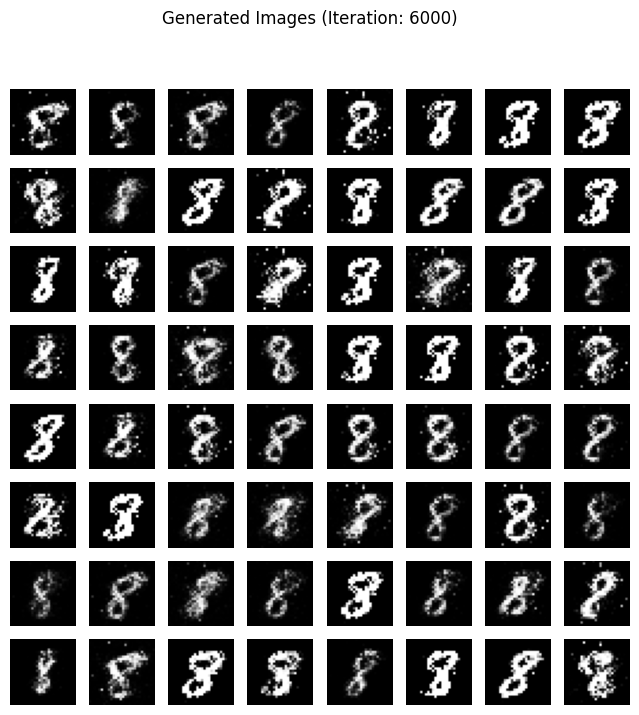

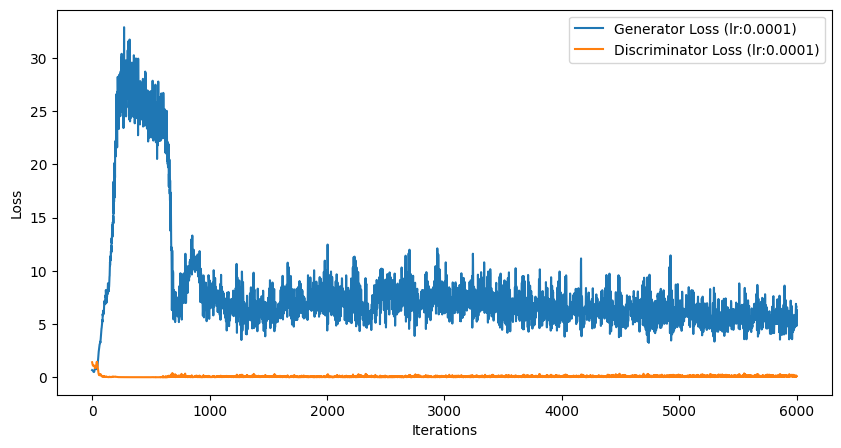

Epoch [11/84], Step [100/600], D_loss: 0.2259, G_loss: 6.0548
Epoch [11/84], Step [200/600], D_loss: 0.0847, G_loss: 6.7372
Epoch [11/84], Step [300/600], D_loss: 0.1029, G_loss: 5.5740
Epoch [11/84], Step [400/600], D_loss: 0.1018, G_loss: 4.7993
Epoch [11/84], Step [500/600], D_loss: 0.2934, G_loss: 5.1551
Epoch [11/84], Step [600/600], D_loss: 0.1061, G_loss: 5.1740
Epoch [12/84], Step [100/600], D_loss: 0.1125, G_loss: 4.6932
Epoch [12/84], Step [200/600], D_loss: 0.1217, G_loss: 5.4434
Epoch [12/84], Step [300/600], D_loss: 0.0799, G_loss: 4.5931
Epoch [12/84], Step [400/600], D_loss: 0.2333, G_loss: 6.4057
Epoch [12/84], Step [500/600], D_loss: 0.1635, G_loss: 6.2689
Epoch [12/84], Step [600/600], D_loss: 0.1128, G_loss: 5.3126
Epoch [13/84], Step [100/600], D_loss: 0.0719, G_loss: 5.5246
Epoch [13/84], Step [200/600], D_loss: 0.1328, G_loss: 4.6667
Epoch [13/84], Step [300/600], D_loss: 0.0807, G_loss: 5.6303
Epoch [13/84], Step [400/600], D_loss: 0.1813, G_loss: 4.5030
Epoch [1

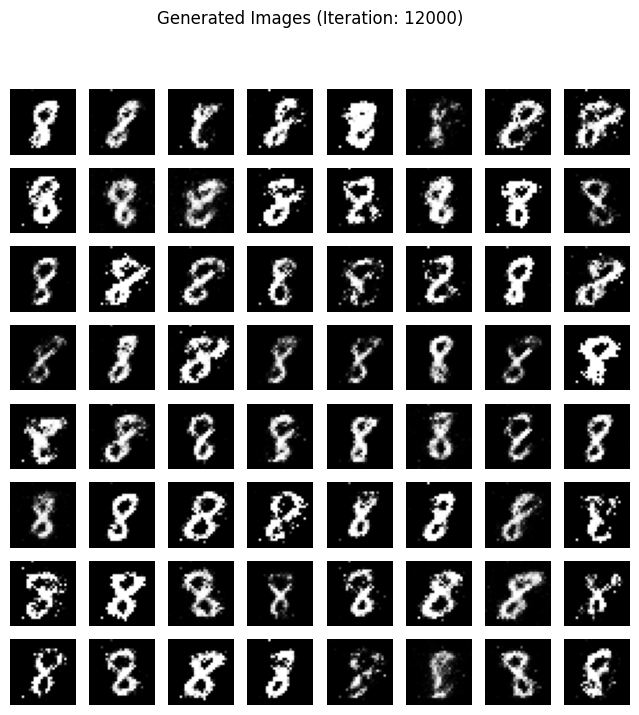

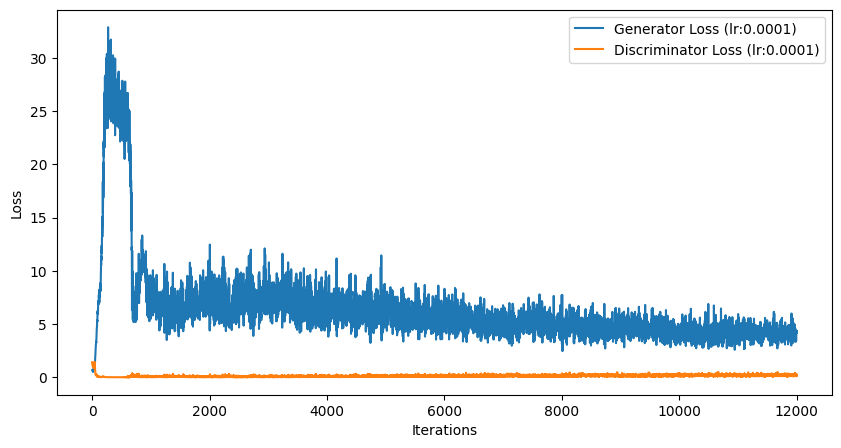

Epoch [21/84], Step [100/600], D_loss: 0.1876, G_loss: 4.8067
Epoch [21/84], Step [200/600], D_loss: 0.0712, G_loss: 4.8914
Epoch [21/84], Step [300/600], D_loss: 0.1881, G_loss: 4.2736
Epoch [21/84], Step [400/600], D_loss: 0.2353, G_loss: 4.0394
Epoch [21/84], Step [500/600], D_loss: 0.0826, G_loss: 4.7468
Epoch [21/84], Step [600/600], D_loss: 0.1807, G_loss: 3.9825
Epoch [22/84], Step [100/600], D_loss: 0.1040, G_loss: 5.0215
Epoch [22/84], Step [200/600], D_loss: 0.3106, G_loss: 3.3907
Epoch [22/84], Step [300/600], D_loss: 0.2156, G_loss: 4.8627
Epoch [22/84], Step [400/600], D_loss: 0.1342, G_loss: 4.0503
Epoch [22/84], Step [500/600], D_loss: 0.1786, G_loss: 5.4001
Epoch [22/84], Step [600/600], D_loss: 0.1794, G_loss: 3.4686
Epoch [23/84], Step [100/600], D_loss: 0.0890, G_loss: 4.4397
Epoch [23/84], Step [200/600], D_loss: 0.1534, G_loss: 4.4430
Epoch [23/84], Step [300/600], D_loss: 0.1767, G_loss: 4.4463
Epoch [23/84], Step [400/600], D_loss: 0.1418, G_loss: 4.9923
Epoch [2

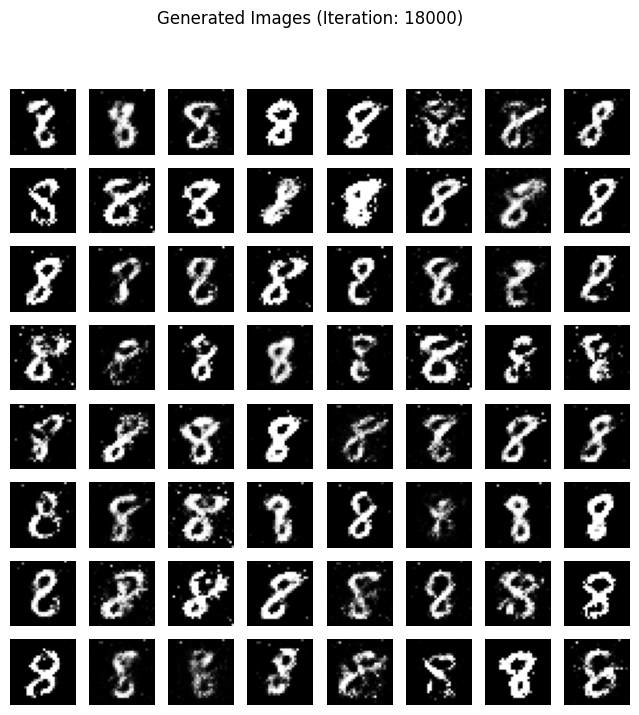

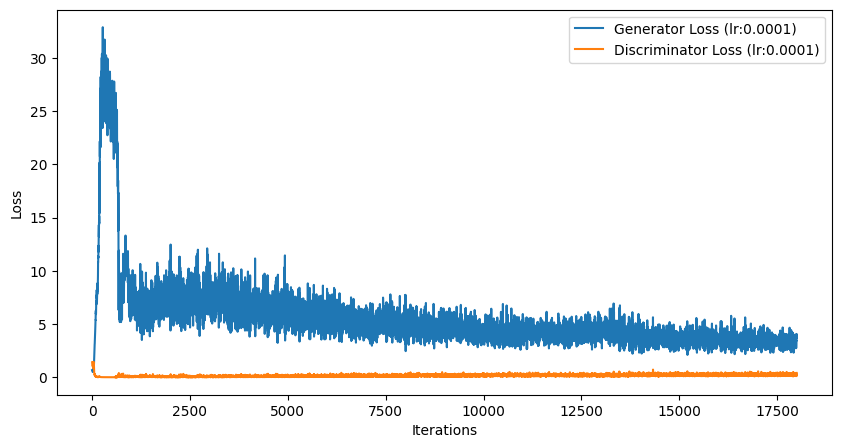

Epoch [31/84], Step [100/600], D_loss: 0.2309, G_loss: 3.3775
Epoch [31/84], Step [200/600], D_loss: 0.3163, G_loss: 3.3719
Epoch [31/84], Step [300/600], D_loss: 0.2242, G_loss: 4.2138
Epoch [31/84], Step [400/600], D_loss: 0.2244, G_loss: 3.7967
Epoch [31/84], Step [500/600], D_loss: 0.3543, G_loss: 3.2359
Epoch [31/84], Step [600/600], D_loss: 0.2770, G_loss: 3.0477
Epoch [32/84], Step [100/600], D_loss: 0.3605, G_loss: 4.0068
Epoch [32/84], Step [200/600], D_loss: 0.1937, G_loss: 3.1165
Epoch [32/84], Step [300/600], D_loss: 0.2327, G_loss: 3.4906
Epoch [32/84], Step [400/600], D_loss: 0.2975, G_loss: 3.1082
Epoch [32/84], Step [500/600], D_loss: 0.3313, G_loss: 2.9348
Epoch [32/84], Step [600/600], D_loss: 0.2549, G_loss: 2.9162
Epoch [33/84], Step [100/600], D_loss: 0.2347, G_loss: 3.0629
Epoch [33/84], Step [200/600], D_loss: 0.2317, G_loss: 3.0438
Epoch [33/84], Step [300/600], D_loss: 0.2257, G_loss: 2.8907
Epoch [33/84], Step [400/600], D_loss: 0.2289, G_loss: 4.0714
Epoch [3

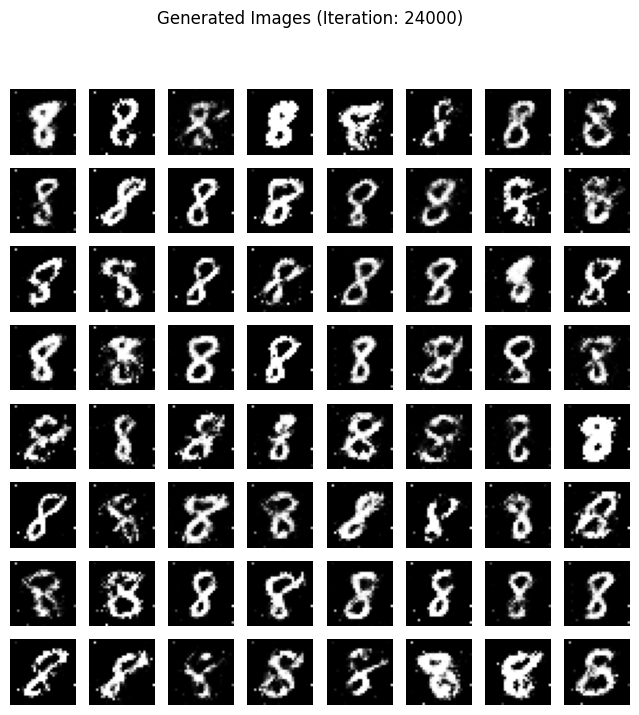

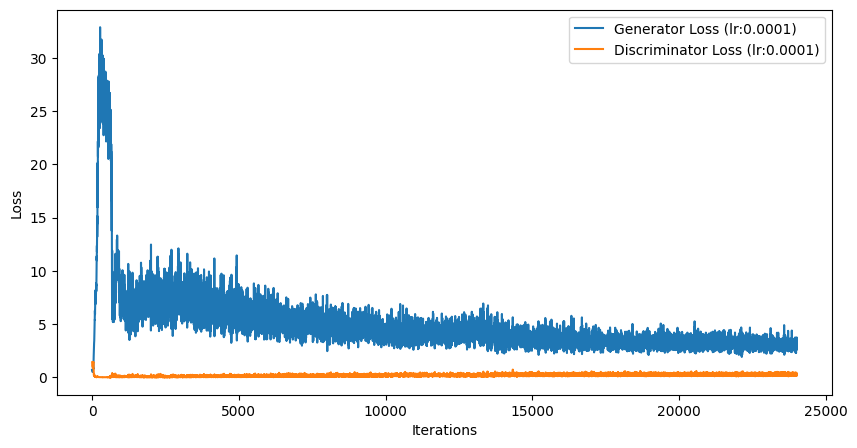

Epoch [41/84], Step [100/600], D_loss: 0.2793, G_loss: 3.0520
Epoch [41/84], Step [200/600], D_loss: 0.2119, G_loss: 3.1566
Epoch [41/84], Step [300/600], D_loss: 0.3435, G_loss: 2.8528
Epoch [41/84], Step [400/600], D_loss: 0.2957, G_loss: 2.5536
Epoch [41/84], Step [500/600], D_loss: 0.2160, G_loss: 3.2683
Epoch [41/84], Step [600/600], D_loss: 0.1574, G_loss: 2.9806
Epoch [42/84], Step [100/600], D_loss: 0.2747, G_loss: 2.2207
Epoch [42/84], Step [200/600], D_loss: 0.2269, G_loss: 3.8794
Epoch [42/84], Step [300/600], D_loss: 0.2111, G_loss: 3.3003
Epoch [42/84], Step [400/600], D_loss: 0.1896, G_loss: 2.8135
Epoch [42/84], Step [500/600], D_loss: 0.2592, G_loss: 3.1406
Epoch [42/84], Step [600/600], D_loss: 0.2755, G_loss: 2.9315
Epoch [43/84], Step [100/600], D_loss: 0.2290, G_loss: 2.8820
Epoch [43/84], Step [200/600], D_loss: 0.2025, G_loss: 3.0683
Epoch [43/84], Step [300/600], D_loss: 0.2578, G_loss: 2.7258
Epoch [43/84], Step [400/600], D_loss: 0.2985, G_loss: 3.1982
Epoch [4

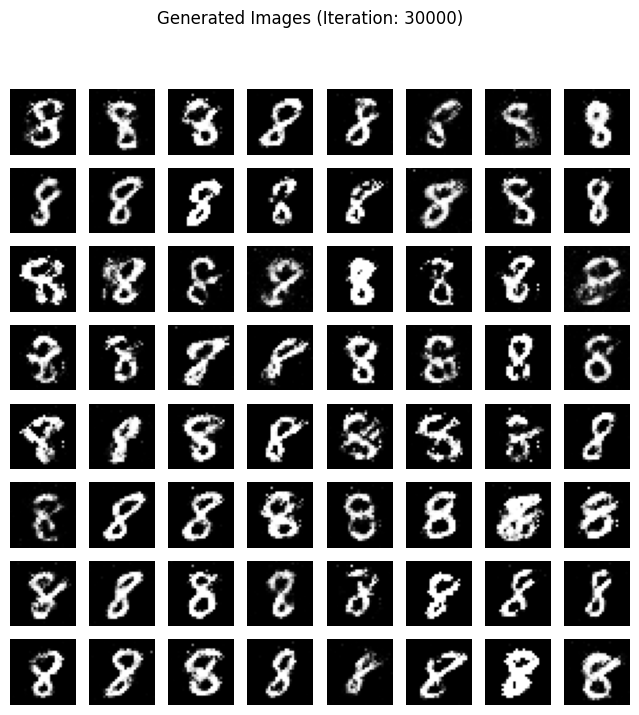

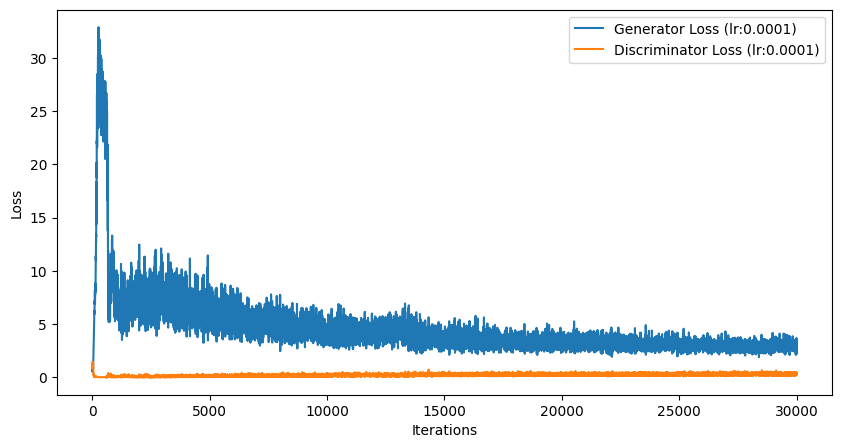

Epoch [51/84], Step [100/600], D_loss: 0.2221, G_loss: 2.7267
Epoch [51/84], Step [200/600], D_loss: 0.2484, G_loss: 3.2389
Epoch [51/84], Step [300/600], D_loss: 0.3057, G_loss: 3.0176
Epoch [51/84], Step [400/600], D_loss: 0.2580, G_loss: 2.8342
Epoch [51/84], Step [500/600], D_loss: 0.0984, G_loss: 3.6377
Epoch [51/84], Step [600/600], D_loss: 0.3237, G_loss: 2.5721
Epoch [52/84], Step [100/600], D_loss: 0.3021, G_loss: 3.0412
Epoch [52/84], Step [200/600], D_loss: 0.2383, G_loss: 3.4051
Epoch [52/84], Step [300/600], D_loss: 0.3131, G_loss: 2.8579
Epoch [52/84], Step [400/600], D_loss: 0.2255, G_loss: 3.2347
Epoch [52/84], Step [500/600], D_loss: 0.3086, G_loss: 2.8991
Epoch [52/84], Step [600/600], D_loss: 0.3123, G_loss: 3.2221
Epoch [53/84], Step [100/600], D_loss: 0.2414, G_loss: 2.6173
Epoch [53/84], Step [200/600], D_loss: 0.2309, G_loss: 2.7081
Epoch [53/84], Step [300/600], D_loss: 0.2653, G_loss: 2.4502
Epoch [53/84], Step [400/600], D_loss: 0.2293, G_loss: 2.8231
Epoch [5

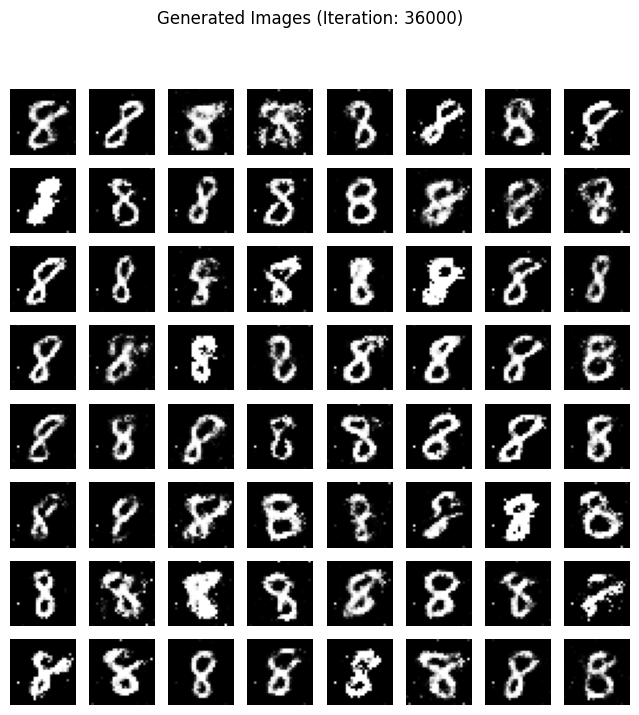

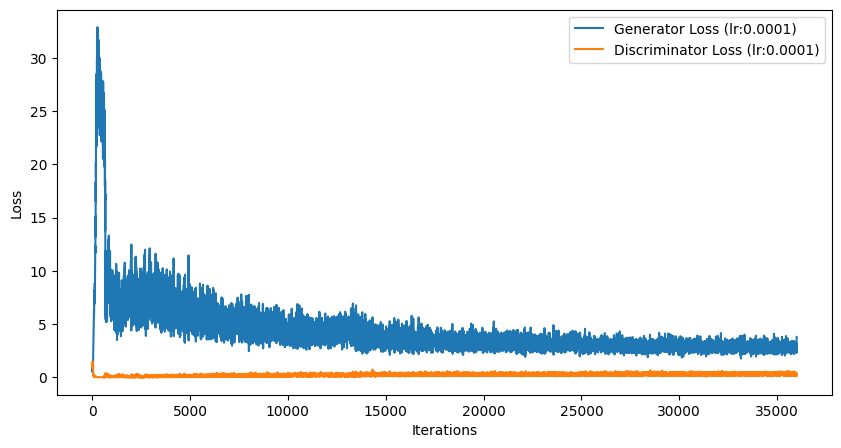

Epoch [61/84], Step [100/600], D_loss: 0.3764, G_loss: 3.0291
Epoch [61/84], Step [200/600], D_loss: 0.3967, G_loss: 2.9138
Epoch [61/84], Step [300/600], D_loss: 0.3121, G_loss: 2.6023
Epoch [61/84], Step [400/600], D_loss: 0.3528, G_loss: 2.7487
Epoch [61/84], Step [500/600], D_loss: 0.2929, G_loss: 2.6963
Epoch [61/84], Step [600/600], D_loss: 0.3192, G_loss: 3.0392
Epoch [62/84], Step [100/600], D_loss: 0.2978, G_loss: 2.7046
Epoch [62/84], Step [200/600], D_loss: 0.1765, G_loss: 2.8036
Epoch [62/84], Step [300/600], D_loss: 0.3487, G_loss: 3.1857
Epoch [62/84], Step [400/600], D_loss: 0.3148, G_loss: 2.9040
Epoch [62/84], Step [500/600], D_loss: 0.2265, G_loss: 2.8347
Epoch [62/84], Step [600/600], D_loss: 0.2923, G_loss: 2.5692
Epoch [63/84], Step [100/600], D_loss: 0.3301, G_loss: 2.2673
Epoch [63/84], Step [200/600], D_loss: 0.3284, G_loss: 2.9412
Epoch [63/84], Step [300/600], D_loss: 0.3478, G_loss: 2.3133
Epoch [63/84], Step [400/600], D_loss: 0.2597, G_loss: 3.0220
Epoch [6

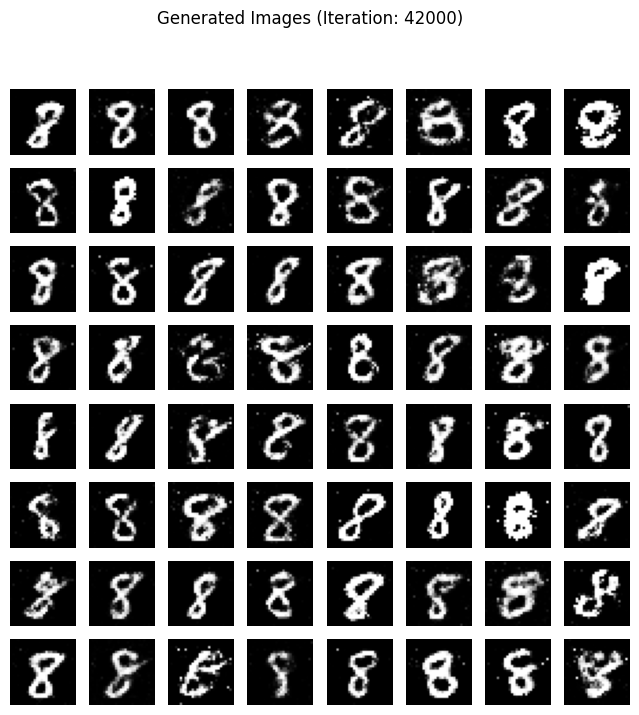

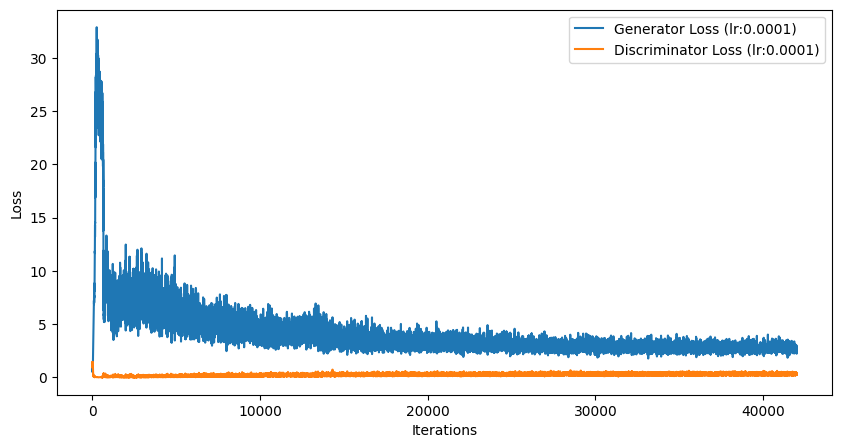

Epoch [71/84], Step [100/600], D_loss: 0.2459, G_loss: 2.8699
Epoch [71/84], Step [200/600], D_loss: 0.3043, G_loss: 2.7546
Epoch [71/84], Step [300/600], D_loss: 0.3207, G_loss: 2.6242
Epoch [71/84], Step [400/600], D_loss: 0.2629, G_loss: 2.5691
Epoch [71/84], Step [500/600], D_loss: 0.3649, G_loss: 2.8055
Epoch [71/84], Step [600/600], D_loss: 0.3092, G_loss: 2.5654
Epoch [72/84], Step [100/600], D_loss: 0.3717, G_loss: 2.5192
Epoch [72/84], Step [200/600], D_loss: 0.3923, G_loss: 2.4994
Epoch [72/84], Step [300/600], D_loss: 0.1813, G_loss: 2.7465
Epoch [72/84], Step [400/600], D_loss: 0.3247, G_loss: 2.6169
Epoch [72/84], Step [500/600], D_loss: 0.2769, G_loss: 2.9655
Epoch [72/84], Step [600/600], D_loss: 0.3669, G_loss: 2.4147
Epoch [73/84], Step [100/600], D_loss: 0.4204, G_loss: 2.2032
Epoch [73/84], Step [200/600], D_loss: 0.3569, G_loss: 2.8002
Epoch [73/84], Step [300/600], D_loss: 0.3245, G_loss: 2.6854
Epoch [73/84], Step [400/600], D_loss: 0.2239, G_loss: 2.5602
Epoch [7

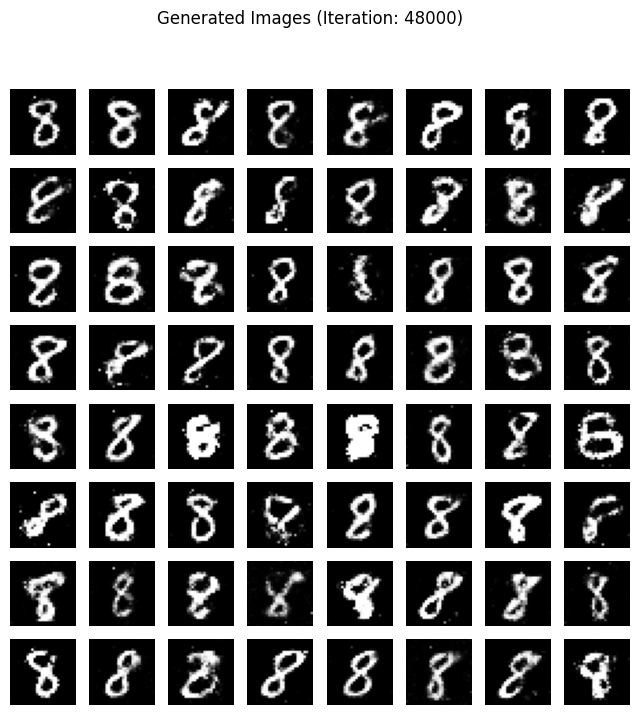

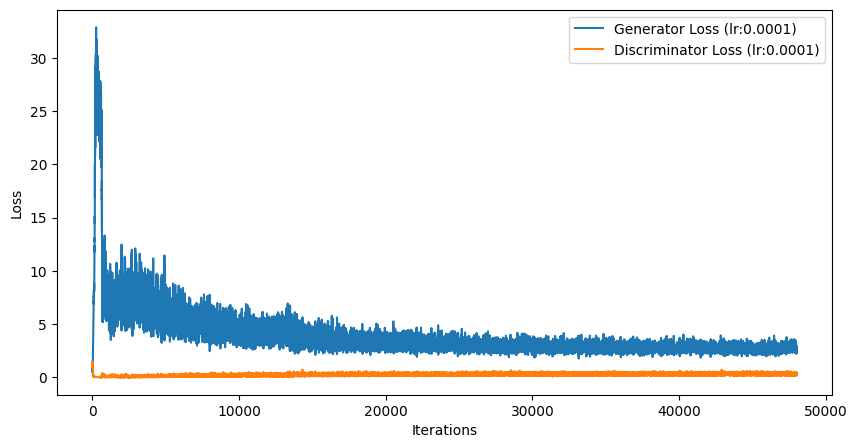

Epoch [81/84], Step [100/600], D_loss: 0.2296, G_loss: 2.9409
Epoch [81/84], Step [200/600], D_loss: 0.2073, G_loss: 3.0423
Epoch [81/84], Step [300/600], D_loss: 0.2217, G_loss: 2.3749
Epoch [81/84], Step [400/600], D_loss: 0.4373, G_loss: 2.6963
Epoch [81/84], Step [500/600], D_loss: 0.1822, G_loss: 2.5624
Epoch [81/84], Step [600/600], D_loss: 0.1900, G_loss: 3.2049
Epoch [82/84], Step [100/600], D_loss: 0.4015, G_loss: 2.6885
Epoch [82/84], Step [200/600], D_loss: 0.3160, G_loss: 2.5941
Epoch [82/84], Step [300/600], D_loss: 0.3799, G_loss: 2.9272
Epoch [82/84], Step [400/600], D_loss: 0.4084, G_loss: 2.6113
Epoch [82/84], Step [500/600], D_loss: 0.1460, G_loss: 2.7902
Epoch [82/84], Step [600/600], D_loss: 0.3042, G_loss: 2.0643
Epoch [83/84], Step [100/600], D_loss: 0.3724, G_loss: 2.5821
Epoch [83/84], Step [200/600], D_loss: 0.4026, G_loss: 2.7165
Epoch [83/84], Step [300/600], D_loss: 0.4512, G_loss: 2.6705
Epoch [83/84], Step [400/600], D_loss: 0.4894, G_loss: 2.1439
Epoch [8

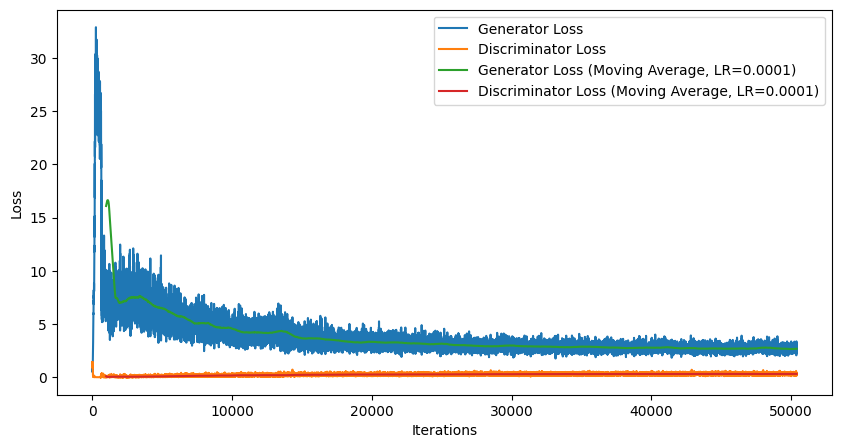

Time taken: 1708.2723517417908


TypeError: ignored

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(10, 10)  # 10 classes for MNIST
        self.main = nn.Sequential(
            nn.Linear(110, 256),  # 100 for noise, 10 for label
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x, labels):
        c = self.label_emb(labels)
        x = torch.cat([x, c], 1)
        return self.main(x).view(-1, 1, 28, 28)


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(10, 10)
        self.main = nn.Sequential(
            nn.Linear(794, 1024),  # 784 for image, 10 for label
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        x = x.view(-1, 784)
        c = self.label_emb(labels)
        x = torch.cat([x, c], 1)
        return self.main(x)

# Initialize the networks
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Define the loss function and optimizers
criterion = nn.BCELoss().to(device)

optimizer_gen = optim.Adam(generator.parameters(), lr=0.0001)
optimizer_disc = optim.Adam(discriminator.parameters(), lr=0.0001)

gen_losses = []
disc_losses = []

# Train the GAN
iterations = 50000
num_epochs = round((iterations/60000)*batch_size)+1
start_time = time.time()
print(f"Training started at: {time.ctime(start_time)}")

for epoch in range(num_epochs):
    for i, (real_images, real_labels) in enumerate(train_loader):

        # Train the discriminator
        optimizer_disc.zero_grad()

        real_images = Variable(real_images).to(device)
        real_labels = Variable(real_labels).to(device)
        valid_labels = Variable(torch.ones(real_images.size(0), 1)).to(device)
        fake_labels = Variable(torch.zeros(real_images.size(0), 1)).to(device)

        outputs = discriminator(real_images, real_labels).to(device)
        real_loss = criterion(outputs, valid_labels) # Binary Cross Entropy (BCE) loss

        # Generate 8 digits
        target_labels = Variable(torch.full((real_images.size(0),), 8, dtype=torch.long)).to(device)
        noise = Variable(torch.randn(real_images.size(0), 100)).to(device)
        fake_images = generator(noise, target_labels).to(device)

        outputs = discriminator(fake_images.detach(), target_labels)
        fake_loss = criterion(outputs, fake_labels) # Binary Cross Entropy (BCE) loss

        disc_loss = real_loss + fake_loss
        disc_loss.backward()
        optimizer_disc.step()

        # Train the generator
        optimizer_gen.zero_grad()

        outputs = discriminator(fake_images, target_labels)
        gen_loss = criterion(outputs, valid_labels)
        gen_loss.backward()
        optimizer_gen.step()

        gen_losses.append(gen_loss.item())
        disc_losses.append(disc_loss.item())

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], D_loss: {:.4f}, G_loss: {:.4f}'
                  .format(epoch+1, num_epochs, i + 1, len(train_loader), disc_loss.item(), gen_loss.item()))

    # Save real images and generated images
    if (epoch + 1) % 10 == 0:
        save_image(real_images, '/content/data/real_images_{}.png'.format(epoch + 1), normalize=True)
        save_image(fake_images, '/content/data/fake_images_{}.png'.format(epoch + 1), normalize=True)

    # Display images during the training process
    if (epoch * len(train_loader) + i + 1) % 2000 == 0:
        display_images(fake_images, f'Generated Images (Iteration: {epoch * len(train_loader) + i + 1})')

        # Plot losses
        plt.figure(figsize=(10, 5))
        plt.plot(gen_losses, label=f'Generator Loss (lr:{optimizer_gen.param_groups[0]["lr"]})')
        plt.plot(disc_losses, label=f'Discriminator Loss (lr:{optimizer_disc.param_groups[0]["lr"]})')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

end_time = time.time()

print(f"Time taken: {end_time - start_time}")

# Calculate moving average
window_size = 1000
gen_losses_avg = np.convolve(gen_losses, np.ones(window_size)/window_size, mode='valid')
disc_losses_avg = np.convolve(disc_losses, np.ones(window_size)/window_size, mode='valid')

# Plot losses with moving average
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.plot(np.arange(window_size-1, len(gen_losses)), gen_losses_avg, label='Generator Loss (Moving Average)')
plt.plot(np.arange(window_size-1, len(disc_losses)), disc_losses_avg, label='Discriminator Loss (Moving Average)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend([
    'Generator Loss',
    'Discriminator Loss',
    f'Generator Loss (Moving Average, LR={optimizer_gen.param_groups[0]["lr"]})',
    f'Discriminator Loss (Moving Average, LR={optimizer_disc.param_groups[0]["lr"]})',
])
plt.show()

end_time = time.time()

print(f"Time taken: {end_time - start_time}")

# Generate adversarial MNIST images
noise = Variable(torch.randn(64, 100)).to(device)
generated_images = generator(noise)
save_image(generated_images, f'/content/data/generated_images_{iterations}.png', normalize=True)

# Generate adversarial MNIST images
noise = Variable(torch.randn(10, 100)).to(device)
repeat_noise = noise.repeat(10, 1)  # Repeat the same noise for each class
labels = torch.LongTensor([i for i in range(10) for _ in range(10)]).to(device)  # Labels for each class
generated_images = generator(repeat_noise, labels)

save_image(generated_images, f'/content/data/generated_images_{iterations}.png', normalize=True)

# Create a grid of images
grid = make_grid(generated_images, nrow=10, normalize=True)

# Convert to numpy array and change layout for matplotlib
grid = grid.permute(1,2,0).detach().cpu().numpy()

# Plot the images
plt.figure(figsize=(10,10))
plt.imshow(grid)
plt.axis('off')
plt.show()


print("Training complete. Generated adversarial MNIST images saved.")

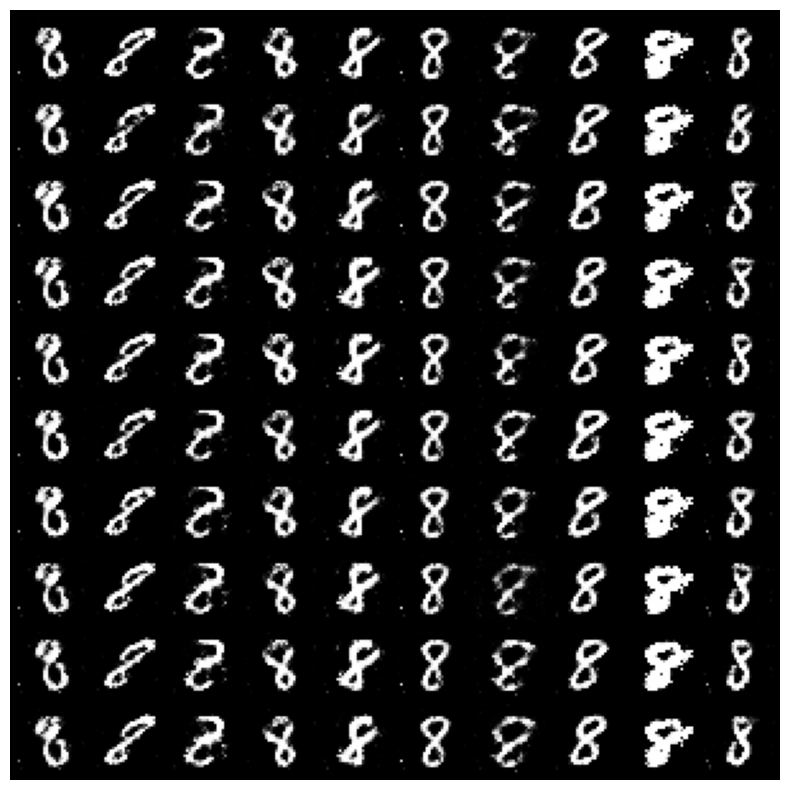

In [ ]:
from torchvision.utils import make_grid

# Generate adversarial MNIST images
noise = Variable(torch.randn(10, 100)).to(device)
repeat_noise = noise.repeat(10, 1)  # Repeat the same noise for each class
labels = torch.LongTensor([i for i in range(10) for _ in range(10)]).to(device)  # Labels for each class
generated_images = generator(repeat_noise, labels)

save_image(generated_images, f'/content/data/generated_images_{iterations}.png', normalize=True)

# Create a grid of images
grid = make_grid(generated_images, nrow=10, normalize=True)

# Convert to numpy array and change layout for matplotlib
grid = grid.permute(1,2,0).detach().cpu().numpy()

# Plot the images
plt.figure(figsize=(10,10))
plt.imshow(grid)
plt.axis('off')
plt.show()

In [ ]:
# Generate adversarial MNIST images
noise = Variable(torch.randn(64, 100)).to(device)
labels = torch.full((64,), 8, dtype=torch.long).to(device)  # Generate '8's
generated_images = generator(noise, labels)
save_image(generated_images, f'/content/data/generated_images_{iterations}.png', normalize=True)